<a href="https://colab.research.google.com/github/JJThoms1/03_Introduction_to_computer_vision_with_tensorflow_video/blob/main/03_Introduction_to_computer_vision_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Network and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as a camera of a self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food101 dataset (100 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101?select=food-101.zip

However, we've modified it to only use two classes (pizza 🍕 & steak 🥩) using the images data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> 🔑 **Note:** We start with a smaller dataset so we can experiment quickly and figure out what works (or better yet, what doesn't work) before scaling up.

In [62]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-09-06 20:21:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.207, 74.125.200.207, 74.125.130.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M  22.8MB/s    in 5.7s    

2024-09-06 20:21:07 (18.2 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



## Inspect the data (become on with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project, this usually means visualizing many samples of your data.

In [63]:
!ls pizza_steak

test  train


In [64]:
!ls pizza_steak/train

pizza  steak


In [65]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [66]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [67]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [68]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectory
# class_names = class_names[:1] <# this removes .DS_store
print(class_names)

['pizza' 'steak']


In [69]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['111051.jpg']
Image shape: (512, 382, 3)


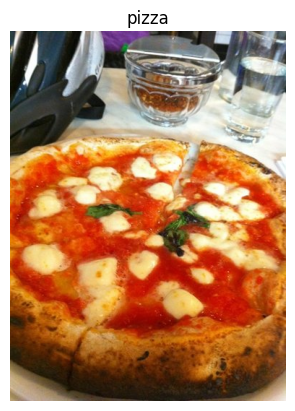

In [70]:
# View random image from the training set
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [71]:
# The images we've imported and plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 382, 3), dtype=uint8, numpy=
array([[[ 44,  66,  63],
        [ 47,  69,  67],
        [ 36,  55,  61],
        ...,
        [120, 130, 131],
        [120, 125, 129],
        [119, 124, 128]],

       [[ 41,  63,  60],
        [ 46,  68,  66],
        [ 40,  59,  65],
        ...,
        [105, 115, 116],
        [106, 114, 117],
        [106, 114, 117]],

       [[ 42,  64,  61],
        [ 47,  69,  67],
        [ 42,  61,  67],
        ...,
        [ 93, 107, 108],
        [ 94, 106, 106],
        [ 93, 103, 104]],

       ...,

       [[183, 159, 115],
        [183, 159, 115],
        [182, 158, 114],
        ...,
        [240, 231, 222],
        [242, 233, 226],
        [244, 235, 228]],

       [[188, 163, 122],
        [185, 160, 119],
        [182, 157, 116],
        ...,
        [240, 233, 225],
        [243, 234, 229],
        [244, 235, 230]],

       [[192, 167, 127],
        [186, 161, 121],
        [181, 156, 116],
        ...,
        [242, 235, 22

In [72]:
# View the image shape
img.shape # returns width, height and color channels

(512, 382, 3)

🔑 **Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 225. (since 225 is the maximum pixel value).

In [73]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.17254902, 0.25882353, 0.24705882],
        [0.18431373, 0.27058824, 0.2627451 ],
        [0.14117647, 0.21568627, 0.23921569],
        ...,
        [0.47058824, 0.50980392, 0.51372549],
        [0.47058824, 0.49019608, 0.50588235],
        [0.46666667, 0.48627451, 0.50196078]],

       [[0.16078431, 0.24705882, 0.23529412],
        [0.18039216, 0.26666667, 0.25882353],
        [0.15686275, 0.23137255, 0.25490196],
        ...,
        [0.41176471, 0.45098039, 0.45490196],
        [0.41568627, 0.44705882, 0.45882353],
        [0.41568627, 0.44705882, 0.45882353]],

       [[0.16470588, 0.25098039, 0.23921569],
        [0.18431373, 0.27058824, 0.2627451 ],
        [0.16470588, 0.23921569, 0.2627451 ],
        ...,
        [0.36470588, 0.41960784, 0.42352941],
        [0.36862745, 0.41568627, 0.41568627],
        [0.36470588, 0.40392157, 0.40784314]],

       ...,

       [[0.71764706, 0.62352941, 0.45098039],
        [0.71764706, 0.62352941, 0.45098039],
        [0.71372549, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [74]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Sequential
import os

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set up paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)


# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu",input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Calculate steps_per_epoch and validation_steps
steps_per_epoch = train_data.samples // train_data.batch_size
validation_steps = valid_data.samples // valid_data.batch_size

# Fit the model
history_1 = model_1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=steps_per_epoch * 5,
    validation_data=valid_data,
    validation_steps=validation_steps)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.7073 - loss: 0.5653 - val_accuracy: 0.7792 - val_loss: 0.4707
Epoch 2/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.8184 - loss: 0.4255 - val_accuracy: 0.9500 - val_loss: 0.3763
Epoch 3/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.8436 - loss: 0.3712 - val_accuracy: 0.8896 - val_loss: 0.3025
Epoch 4/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.8621 - loss: 0.3282 - val_accuracy: 0.9000 - val_loss: 0.2952
Epoch 5/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.8776 - loss: 0.3060 - val_accuracy: 0.8229 - val_loss: 0.3944


> 🔑 **Note:** If the above cell is taking longer than ~10 seconds per epoch, make sure you're using a GPU by going to Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU (you may have to rerun some cells above)

In [75]:
# Get a model summary
model_1.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

## Using the same model as before

Replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from [TensorFlow playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.79156&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [76]:
train_data

In [77]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Calculate steps_per_epoch and validation_steps
steps_per_epoch = train_data.samples // train_data.batch_size
validation_steps = valid_data.samples // valid_data.batch_size

# Fit the model
history_2 = model_2.fit(train_data,
    epochs=5,
    steps_per_epoch=steps_per_epoch * 5,
    validation_data=valid_data,
    validation_steps=validation_steps)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


230/230 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.5055 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.5039 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.4986 - loss: 0.6932 - val_accuracy: 0.4938 - val_loss: 0.6932
Epoch 4/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.4996 - loss: 0.6932 - val_accuracy: 0.6500 - val_loss: 0.6928
Epoch 5/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.4853 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


In [78]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 4)                   │         602,116 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

Despite having 20x more parameters than our CNN (model_1) model_2 performs terribly... let's try to imporve it.

In [79]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a bit)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=steps_per_epoch * 5,
                        validation_data=valid_data,
                        validation_steps=validation_steps)

Epoch 1/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.6035 - loss: 3.1752 - val_accuracy: 0.7354 - val_loss: 0.6076
Epoch 2/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7100 - loss: 0.6573 - val_accuracy: 0.8500 - val_loss: 0.3232
Epoch 3/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.7620 - loss: 0.5387 - val_accuracy: 0.7792 - val_loss: 0.4480
Epoch 4/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7683 - loss: 0.5411 - val_accuracy: 0.5000 - val_loss: 0.9252
Epoch 5/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.7732 - loss: 0.5449 - val_accuracy: 0.6125 - val_loss: 0.8742


In [80]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

🔑**Note:** You can think of trainable parameters as **patterns a model can learn from data.** Intuitively, you might think more if better. And in lots of cases, it is. But in this case, the difference here is the two different stylesof model we're using. Where a series of dense layers has a number of different learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image.** So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in deciphering between differnt **features** in a image.

In [81]:
model_1.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

## Binary Classification: Let's break it down

1. Become one with the data (visualize, valid_data)
2. Preprocess the data (prepare it for our model, main step here was scaling/normalizing & turning our data into batches)
3. Create a model (start with a baseline model and build upon it)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to be our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

1. Become one with the data

['3894222.jpg']
Image shape: (512, 512, 3)
['282013.jpg']
Image shape: (512, 382, 3)


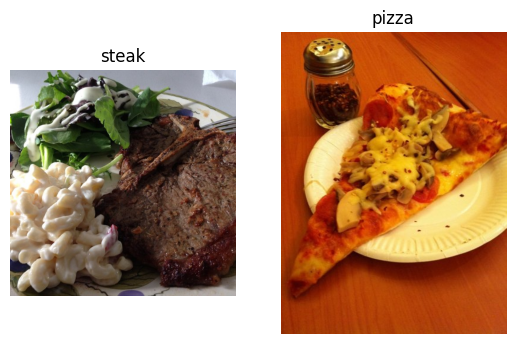

In [82]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza");

## Preprocess the data (prepare it for a model)

In [83]:
# Define directory dataset path
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than looking at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of our processor (GPU)
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

"Because 32 is good for your health". Yann LeCun quoute

In [84]:
# Create a train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [85]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224, 224), # Target size of images (height, width)
                                               class_mode="binary", # Type of data you're working with
                                               batch_size=32) # Size of mini batches to load data into

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [86]:
# Get a sample of a training data batch
images, labels = next(train_data) # get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [87]:
# How many batches are there?
len(train_data)

47

In [88]:
1500/32

46.875

In [89]:
# Get the first two images
images[:2], images[:0].shape

(array([[[[0.20784315, 0.08627451, 0.00784314],
          [0.28235295, 0.16470589, 0.07058824],
          [0.2509804 , 0.12941177, 0.01568628],
          ...,
          [0.427451  , 0.3647059 , 0.22352943],
          [0.40784317, 0.34901962, 0.19607845],
          [0.41960788, 0.36078432, 0.20000002]],
 
         [[0.26666668, 0.15686275, 0.07450981],
          [0.21960786, 0.10196079, 0.00784314],
          [0.28235295, 0.16862746, 0.0509804 ],
          ...,
          [0.427451  , 0.3647059 , 0.22352943],
          [0.42352945, 0.3647059 , 0.20392159],
          [0.41176474, 0.3529412 , 0.18431373]],
 
         [[0.20784315, 0.10196079, 0.01960784],
          [0.26666668, 0.15686275, 0.0627451 ],
          [0.30980393, 0.20392159, 0.09019608],
          ...,
          [0.42352945, 0.3647059 , 0.20392159],
          [0.427451  , 0.36862746, 0.20000002],
          [0.427451  , 0.36862746, 0.20000002]],
 
         ...,
 
         [[0.19607845, 0.13725491, 0.0627451 ],
          [0.20784

In [90]:
images[7].shape

(224, 224, 3)

In [91]:
# View the first batch of labels
labels

array([1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is relatively simple model or existing results that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

> 🔑 **Note:** In deep learning, there is almost an infinite amout of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem.)

In [92]:
# Make the creating of our model a little bit easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
from tensorflow.keras import Sequential

In [93]:
# Create the model (this will be our baseline, a layer of convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # filter is the number of sliding windows going across and input (higher = more complex model)
           kernel_size=3, # the size of the sliding windown going arcoss and input
           strides=1, # the size of the step the sliding windown takes across an input
           padding="valid", # if "same", output shape is same as input shape, if "valid", output shape gets compressed
           activation="relu",
           input_shape=(224, 224, 3)), # input layer (specified input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 input neuron)
])

🛠️ **Practice:** Understand what is going on in a Conv2D layer by going through the CNN explainer website. https://poloclub.github.io/cnn-explainer/

In [94]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [95]:
# Get a summary of our model
model_4.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 109, 109, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 118810)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │         118,811 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 120,911 (472.31 KB)

 Trainable params: 120,911 (472.31 KB)

 Non-trainable params: 0 (0.00 B)

### 4. Fit the model

In [96]:
# Check the length of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [97]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data) * 5,
                        validation_data=test_data,
                        validation_steps=len(test_data) * 5)

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.6168 - loss: 0.8278 - val_accuracy: 0.8160 - val_loss: 0.4473
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.7812 - loss: 0.4606 - val_accuracy: 0.8260 - val_loss: 0.4110
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.8086 - loss: 0.4254 - val_accuracy: 0.8560 - val_loss: 0.3609
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.8329 - loss: 0.3826 - val_accuracy: 0.8660 - val_loss: 0.3291
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.8573 - loss: 0.3389 - val_accuracy: 0.8540 - val_loss: 0.3424


In [98]:
model_1.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.8238 - loss: 0.4024


[0.3906579911708832, 0.8240000009536743]

### 5. Evaluating our model

It looks like our model is learning something, let's evaluate it.

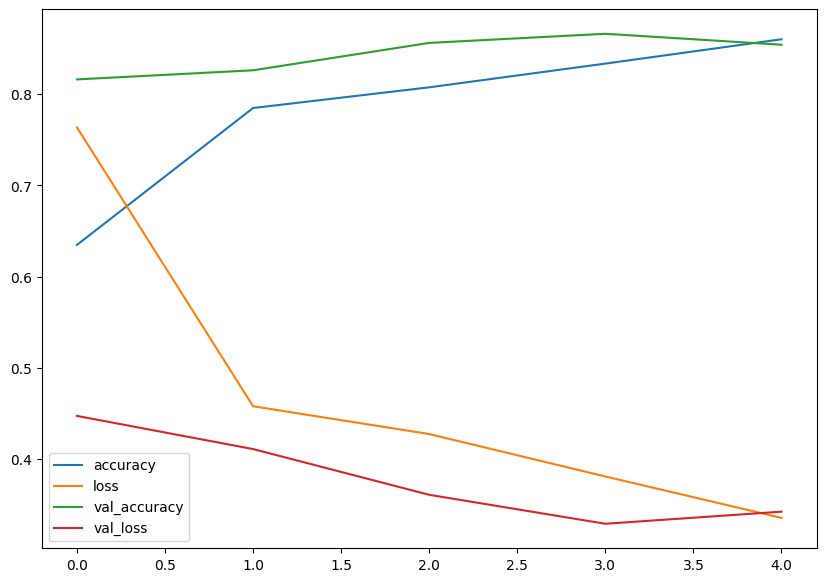

In [99]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [100]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_loss")
  plt.title("accuracy")
  plt.xlabel("Epochs")
  plt.legend()

> 🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means it's learning the patterns in the training set *too well* and thus the model's ability to generalize to unseen data will be diminished.

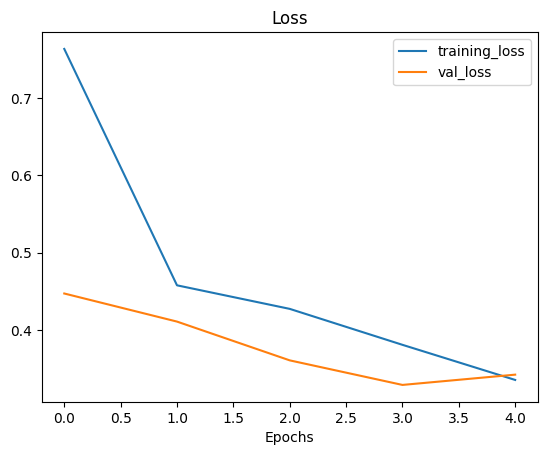

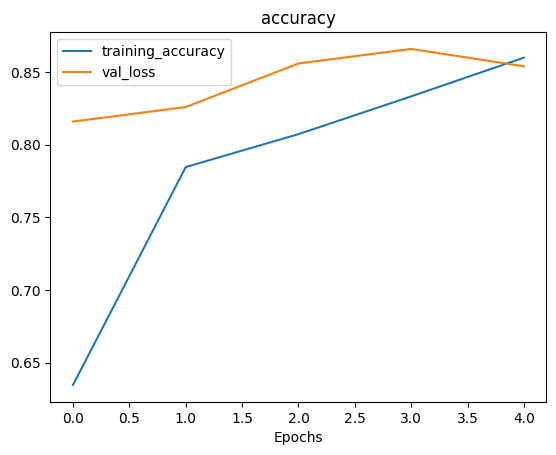

In [101]:
# Check out the loss and accuracy for model_4
plot_loss_curves(history_4)

🔑 **Note:** Ideally the loss curves (traininf and validation) will be very similar to each other (training and validation loss decreasing at similar rates), when there are large difference your model may be **overfitting**.

## 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

> 🔑 **Note:** Reducing overfitting is also known as **regularization**

In [102]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [103]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [104]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data) * 5,
                        validation_data=test_data,
                        validation_steps=len(valid_data) * 5)

Epoch 1/5
 46/235 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - accuracy: 0.6807 - loss: 0.6061

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.7150 - loss: 0.5663 - val_accuracy: 0.7200 - val_loss: 0.5093
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.7965 - loss: 0.4515 - val_accuracy: 0.8460 - val_loss: 0.3532
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.8134 - loss: 0.4190 - val_accuracy: 0.8340 - val_loss: 0.3820
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.8262 - loss: 0.4021 - val_accuracy: 0.8520 - val_loss: 0.3376
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.8187 - loss: 0.4118 - val_accuracy: 0.8580 - val_loss: 0.3486


In [105]:
# Get a summary of our model with MaxPool
model_5.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

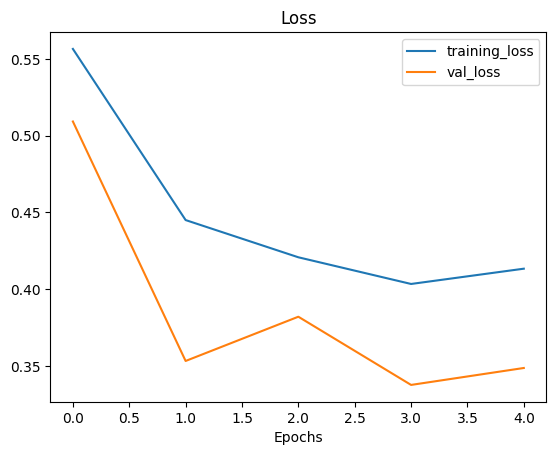

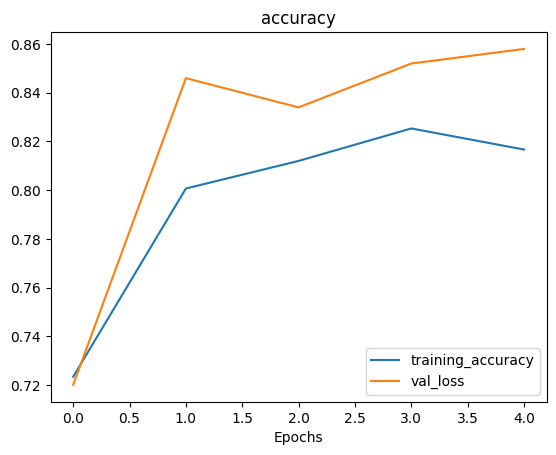

In [106]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [107]:
# Create ImageDataGenerator training instance with data augmentations
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how much do you want to rotate an image?
                                             shear_range=0.2, # how much do you want to shear and image?
                                             zoom_range=0.2, # zoom in randomly on an image
                                             width_shift_range=0.2, # move your image around on the x-axis
                                             height_shift_range=0.2, # move your image around on the y-axis
                                             horizontal_flip=True) # do you want to flip an image?

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen_augmented = ImageDataGenerator(rescale=1/255.)

> 🤔 **Question:** What is data Augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our model to learn more generalizable (hopefully) patterns.
Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation...

In [108]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purposes only


# Create non-augment train data batches
print("Non-augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode="binary",
                                              shuffle=False)

IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print("Non-augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=False)

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


> 🔑 **Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built in data augmentation parameters our images are left as there are in the directories but are modified as they're loaded in the model.

Finally... let's visualize some augmented data.

In [109]:
# Get sample data batches
images, labels = train_data.__next__()
augmented_images, augmented_labels = train_data_augmented.__next__() # note: labels aren't augmented... only data (images)

Showing image number: 24


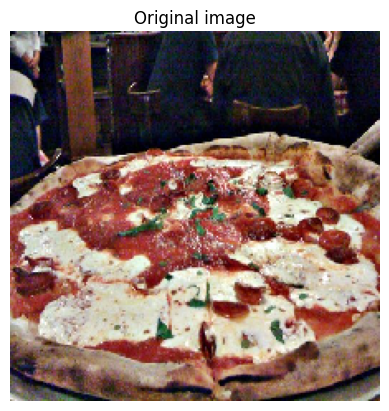

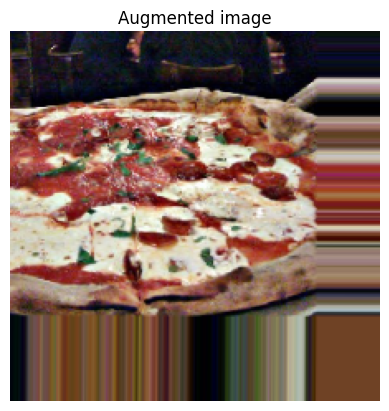

In [110]:
# Show original images and augmented images
import random
random_number = random.randint(0, 32) # our batch sizes are 32...
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Now we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data.

In [111]:
# Create a model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented) * 5,
                        validation_data=test_data,
                        validation_steps=len(test_data)*5)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 80ms/step - accuracy: 0.4735 - loss: 0.7484 - val_accuracy: 0.5160 - val_loss: 0.6733
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 39s 75ms/step - accuracy: 0.5658 - loss: 0.6838 - val_accuracy: 0.5400 - val_loss: 0.6766
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 72ms/step - accuracy: 0.5290 - loss: 0.7246 - val_accuracy: 0.6680 - val_loss: 0.6511
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 78ms/step - accuracy: 0.5576 - loss: 0.6889 - val_accuracy: 0.6900 - val_loss: 0.6626
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 73ms/step - accuracy: 0.6206 - loss: 0.6655 - val_accuracy: 0.7900 - val_loss: 0.6135


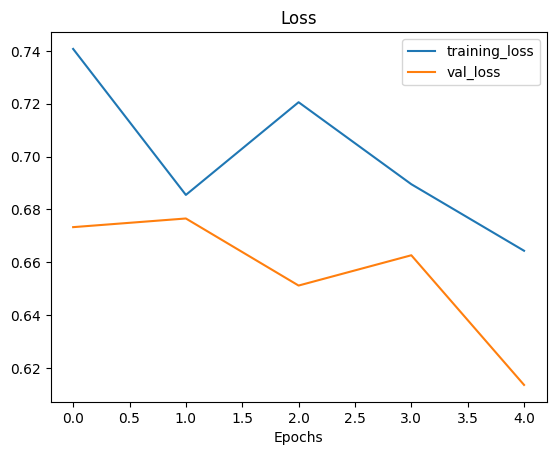

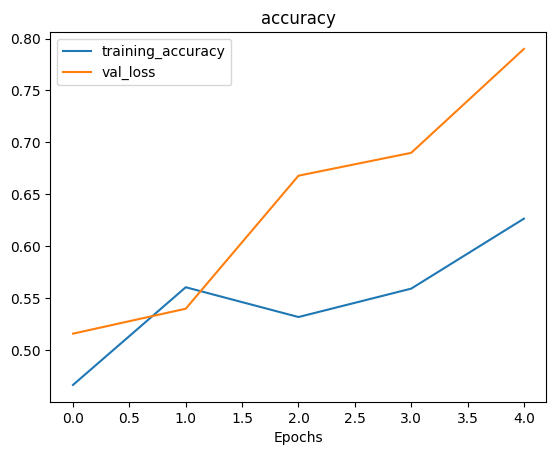

In [112]:
# Check our models training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (same as before) and see what happens.

In [113]:
# Import data and augment it and shuffle it from our training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=True) # shuffle data this time (default)

Found 1500 images belonging to 2 classes.


In [114]:
# Create the model (same as model_5 & model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # we're fitting on augmented and shuffled data now
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled) * 5,
                        validation_data=test_data,
                        validation_steps=len(test_data) * 5)

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 75ms/step - accuracy: 0.6056 - loss: 0.6396 - val_accuracy: 0.6300 - val_loss: 0.6287
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - accuracy: 0.7212 - loss: 0.5529 - val_accuracy: 0.7140 - val_loss: 0.5188
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 78ms/step - accuracy: 0.7618 - loss: 0.5020 - val_accuracy: 0.8120 - val_loss: 0.4054
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 76ms/step - accuracy: 0.7619 - loss: 0.4996 - val_accuracy: 0.8180 - val_loss: 0.3987
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 72ms/step - accuracy: 0.7974 - loss: 0.4600 - val_accuracy: 0.8620 - val_loss: 0.3300


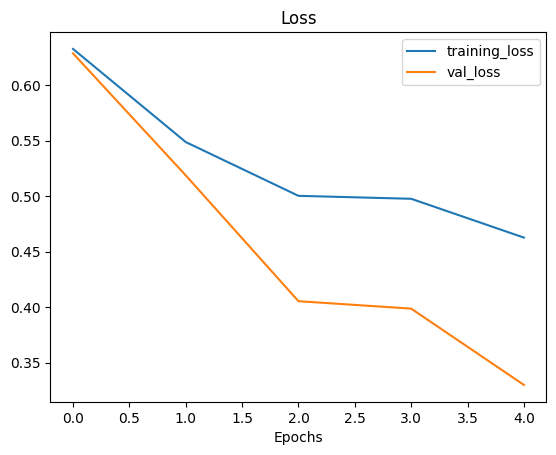

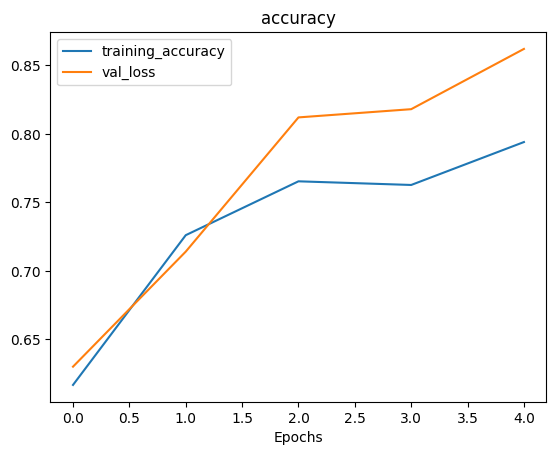

In [115]:
# Plot the loss curves
plot_loss_curves(history_7)

🔑 **Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza &steak at the same time instead of just pizza then steak).

### 7. Repeat until satisfied.

Since we've already beaten out baseline, there are a few things we could try to continue to imporve our model:

* Increase the number of layers (e.g. add more `Conv2D`/ `MaxPool2D` layers)
* Increase the number of filters in the convolutional layers (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunity to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case.

## Making a prediction with our trained model on our own custom data

In [116]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2024-09-06 20:29:02--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.01s   

2024-09-06 20:29:02 (183 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



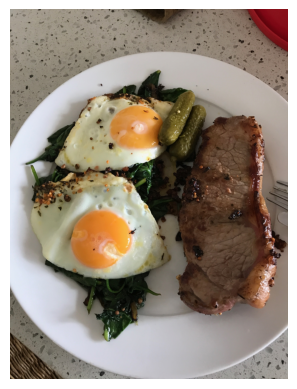

In [117]:
# View our example images
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!wget -O 03-steak.jpeg https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg # Changed the url to download the raw image file
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [118]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

🔑 **Note:** When you train a neural network and you want to make a prediction with it on your own custom data, it's important that your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [119]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
    """
    Reads an image from filename, turns it into a tensor and reshapes it (img_shape, img_shape, colour_channel).
    """
    # Read in the image
    img = tf.io.read_file(filename)
    # Decode the read file into a tensor
    img = tf.image.decode_image(img)
    # Resize the image (to the same size our model was trained on)
    img = tf.image.resize(img, size=[img_shape, img_shape])
    # Rescale the image (get all values between 0 & 1)
    img = img / 255.0
    return img

In [120]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [121]:
model_7.predict(tf.expand_dims(steak, axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


array([[0.77781564]], dtype=float32)